### 📈 Curvature Optimization

Once the spline is built:
- You must **replace the assumed boundary conditions** (like natural spline: second derivative = 0 at endpoints).
- Your goal is to **optimize** the spline such that the **total curvature is minimized**.
- This will result in a **smoother path**—which is desirable for autonomous vehicle trajectory planning.


### 🔍 What does Optimization mean here?
There are 3 parts to an optimization problem:
- Objective (or Cost) Function :
This is the function you want to minimize or maximize.
- Parameters (or Decision Variables):
These are the variables you are allowed to change in order to achieve the best value of the objective.
- Constraints:
These are the rules or limits that the parameters and/or the solution must satisfy.
In general, optimization means adjusting parameters to minimize or maximize an objective — like reducing cost, increasing speed, or in our case: minimizing curvature.

Here, you are given 4 fixed waypoints. Your goal is to interpolate these points using cubic splines, but with a twist:

refer to the first 3 videos of the following playlist for a better understanding:
[Video: Introduction to Curve Optimization](https://youtube.com/playlist?list=PLLK3oSbvdxFdF67yVxF_1FQO9SbBY3yTL&si=EMnkQ3Gb_EleDISu)

---
## 🎯 PROBLEM STATEMENT
You are given 4 discrete waypoints from the previous section. Your task is to interpolate these points using **cubic spline interpolation**, but with a focus on **optimizing the shape of the curve**.

Essentially, you are required to **minimize the total curvature** of the resulting spline by **varying the second derivative values at the boundaries**. This should be done **without using inbuilt spline functions** from libraries such as `scipy`. The goal is to find the **smoothest possible path** through the points, which would represent the **ideal trajectory** for a vehicle to follow. You may choose suitable bounds for the second derivative values and iterate through different combinations of boundary conditions to determine the configuration that leads to the **minimum total curvature**.

---

## Curvature Formula

The **curvature** $\kappa(t)$ of a 2D parametric curve $(x(t), y(t))$ is given by:

$$
\kappa(t) = \frac{ |x'(t)y''(t) - y'(t)x''(t)| }{ \left( (x'(t))^2 + (y'(t))^2 \right)^{3/2} }
$$

Where:
- $x'(t)$ and $y'(t)$ are the **first derivatives** with respect to the parameter $t$
- $x''(t)$ and $y''(t)$ are the **second derivatives**

---

## 📌 Deliverables

1. Your own implementation of cubic spline interpolation.
2. Plots of:
   - Original points
   - Interpolated spline without optimization
   - Interpolated spline with optimization
---

### 🌟 Optional Assignement

You may notice that directly finding the smoothest curve through waypoints seems inefficient and computationally expensive. Fortunately, mathematicians have developed robust optimization techniques that are readily available through libraries like `scipy.optimize`.

In this task, try enhancing the **cubic interpolation curve** you obtained earlier by finding an **optimal trajectory through the waypoints** — one that minimizes the curvature at every interpolated point. To do this, you can treat the **second derivatives at the curve’s boundaries** as variables to be optimized. Use `scipy` functions to perform this optimization and compare the resulting smooth curve to the original interpolation.

However, you may not notice an appreciable reduction in sharpness and a smoother, more natural path. What else can be done then for the **optimal raceline** for our car?

---

**Good luck!**  Let the paths be smooth and the math be satisfying!

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def derivative(x,y):
    return np.diff(y)/np.diff(x)
def derivative2(x,der):
    return np.diff(der)/np.diff(x[:-1])
def curvature(x,y):
    return abs(derivative2(x,derivative(x,y)))/((1+derivative(x,y)**2)**1.5)[:-1]
def S1(x,coeffs):
    s=0
    for i in range(0,4):
       s+=coeffs[i]*x**(3-i)
    return s 
def S2(x,coeffs):
    s=0
    for i in range(4,8):
       s+=coeffs[i]*x**((3-i)%4)
    return s 
def S3(x,coeffs):
    s=0
    for i in range(8,12):
       s+=coeffs[i]*x**((11-i)%4)
    return s



In [84]:
x=[]
y=[]
valuex=np.array(list(eval(input("enter x values"))))
valuey=np.array(list(eval(input("enter y values"))))

In [85]:
matrix= np.zeros((12,12))
variables=' [a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]'
print(variables+"\n", matrix)

 [a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [86]:
def cubicspline(x, y, v1, v2):
    matrix = np.zeros((12, 12))

    for i in range(4):
        matrix[0][i] = x[0]**(3 - i)
        matrix[1][i] = x[1]**(3 - i)
        matrix[2][i + 4] = x[1]**(3 - i)
        matrix[3][i + 4] = x[2]**(3 - i)
        matrix[4][i + 8] = x[2]**(3 - i)
        matrix[5][i + 8] = x[3]**(3 - i)

        if 2 - i >= 0:
            matrix[6][i] = (3 - i) * x[1]**(2 - i)
            matrix[6][i + 4] = -(3 - i) * x[1]**(2 - i)
            matrix[8][i + 4] = (3 - i) * x[2]**(2 - i)
            matrix[8][i + 8] = -(3 - i) * x[2]**(2 - i)

        if 1 - i >= 0:
            matrix[7][i] = (3 - i) * (2 - i) * x[1]**(1 - i)
            matrix[7][i + 4] = -(3 - i) * (2 - i) * x[1]**(1 - i)
            matrix[9][i + 4] = (3 - i) * (2 - i) * x[2]**(1 - i)
            matrix[9][i + 8] = -(3 - i) * (2 - i) * x[2]**(1 - i)

    # Boundary conditions at the endpoints
    matrix[10][0] = 6 * x[0]
    matrix[10][1] = 2

    matrix[11][8] = 6 * x[3]
    matrix[11][9] = 2    

    rhs = np.zeros(12)
    rhs[0] = y[0]
    rhs[5] = y[3]
    rhs[1] = rhs[2] = y[1]
    rhs[3] = rhs[4] = y[2]
    rhs[10] = v1
    rhs[11] = v2

    coeffs = np.linalg.solve(matrix, rhs)

    x1 = np.linspace(x[0], x[1], 100)
    x2 = np.linspace(x[1], x[2], 100)
    x3 = np.linspace(x[2], x[3], 100)

    y1 = S1(x1, coeffs)
    y2 = S2(x2, coeffs)
    y3 = S3(x3, coeffs)

    x = np.concatenate((x1[:-1], x2[:-1], x3))
    y = np.concatenate((y1[:-1], y2[:-1], y3))  
    return x, y


In [ ]:
learning_rate = 1
a=b=0
eps=1e-2

for i in range(10000):
    x, y = cubicspline(valuex, valuey, a, b)
    loss = np.sum(curvature(x, y))

    if (i%100==0): print (loss)   

    # Gradient wrt a
    x_eps_a, y_eps_a = cubicspline(valuex, valuey, a + eps, b)
    loss_a = np.sum(curvature(x_eps_a, y_eps_a))
    grad_a = (loss_a - loss) / eps

    # Gradient wrt b
    x_eps_b, y_eps_b = cubicspline(valuex, valuey, a, b + eps)
    loss_b = np.sum(curvature(x_eps_b, y_eps_b))
    grad_b = (loss_b - loss) / eps

    
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b

    

198.81727187600296
196.01669332352856
196.01668891095298
196.01668889271042
196.01668889793206
196.01668889181582
196.0166888953493
196.01668889394227
196.0166888965396
196.01668889714648
196.01668889776596
196.01668889294973
196.01668888919147
196.01668889791395
196.01668889161013
196.0166888978904
196.01668888974783
196.016688892581
196.01668888604974
196.01668889509978
196.01668889281103
196.0166888905927
196.0166888948715
196.0166888973536
196.01668889076237
196.0166888943781
196.01668888815232
196.01668889796252
196.01668889085664
196.01668889671578
196.01668889476707
196.01668889169815
196.0166888943712
196.01668889488505
196.0166888987475
196.0166888944106
196.01668889490787
196.01668889235503
196.01668889780194
196.0166888889706
196.0166888918958
196.01668889259722
196.01668889507914
196.01668888914884
196.01668890378457
196.0166888945526
196.01668889549336
196.0166888913912
196.01668889408532
196.01668889205965
196.0166888969261
196.01668889265062
196.01668889400827
196.016688

[-3.55271368e-15 -3.98212897e-02 -7.82684964e-02 -1.15358983e-01
 -1.51110113e-01 -1.85539248e-01 -2.18663753e-01 -2.50500989e-01
 -2.81068320e-01 -3.10383110e-01 -3.38462720e-01 -3.65324514e-01
 -3.90985855e-01 -4.15464107e-01 -4.38776631e-01 -4.60940791e-01
 -4.81973950e-01 -5.01893471e-01 -5.20716717e-01 -5.38461050e-01
 -5.55143835e-01 -5.70782434e-01 -5.85394210e-01 -5.98996525e-01
 -6.11606744e-01 -6.23242228e-01 -6.33920342e-01 -6.43658447e-01
 -6.52473908e-01 -6.60384086e-01 -6.67406346e-01 -6.73558049e-01
 -6.78856559e-01 -6.83319239e-01 -6.86963452e-01 -6.89806561e-01
 -6.91865929e-01 -6.93158919e-01 -6.93702894e-01 -6.93515217e-01
 -6.92613251e-01 -6.91014359e-01 -6.88735904e-01 -6.85795248e-01
 -6.82209756e-01 -6.77996790e-01 -6.73173712e-01 -6.67757887e-01
 -6.61766676e-01 -6.55217443e-01 -6.48127552e-01 -6.40514364e-01
 -6.32395243e-01 -6.23787552e-01 -6.14708655e-01 -6.05175913e-01
 -5.95206690e-01 -5.84818349e-01 -5.74028253e-01 -5.62853765e-01
 -5.51312247e-01 -5.39421

<function matplotlib.pyplot.show(close=None, block=None)>

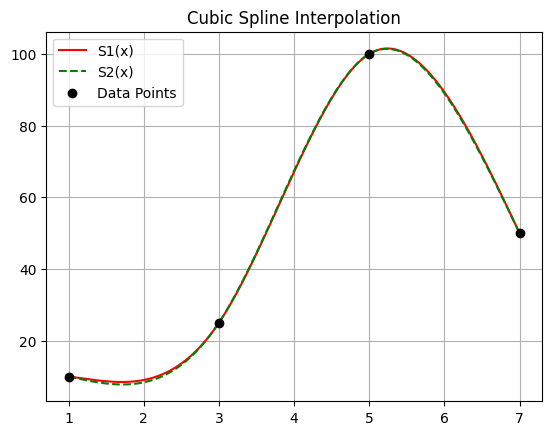

In [94]:
x2,y2=cubicspline(valuex,valuey,0,0)
print(y2-y)
print ("original curvature sum:", np.sum(curvature(x2,y2)), "\n")
print ("new curvature sum:", np.sum(curvature(x,y)), "\n")
plt.plot(x, y, label='S1(x)', color='red')
plt.plot(x2, y2, linestyle='--', label='S2(x)', color='green')
# plt.plot(x3, y3, label='S3(x)', color='blue')
plt.scatter(valuex, valuey, color='black', zorder=5, label='Data Points')
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.grid (True)
plt.show